### Data Cleaning on Australian DETE & TAFE Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)<br>

We'll play the role of data analyst and pretend our stakeholders want to know the following:<br>
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?<br>
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?<br>

In [51]:
# Import of necessary packages
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dete = "dete-exit-survey-january-2014.csv"
tafe = "tafe-employee-exit-survey-access-database-december-2013.csv"

In [3]:
df_dete = pd.read_csv(dete, encoding='windows-1252', na_values="Not Stated")
df_tafe = pd.read_csv(tafe, encoding='windows-1252', na_values="Not Stated")

In [4]:
# Lets have a first look at the structure of these dataframes
# DETE
df_dete.head()
df_dete.info()
df_dete.shape
#print(df_dete.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

(822, 56)

In [5]:
# TAFE
df_tafe.head()
df_tafe.info()
df_tafe.shape
#print(df_tafe.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

(702, 72)

#### Key findings:
1. Both datasets have about 750 rows with 50-70 columns<br>
2. In both datasets several columns have missing values from 0-98%<br>
3. The datasets have no obvious overlay, except for Gender, Age, Employment-Type // Position and Duration (indirect only)<br>
4. We can probably drop at DETE columns 27-48 and at TAFE columns 16-65 (see next steps)

In [6]:
df_deten = df_dete.drop(df_dete.columns[28:49],axis = 1)
df_tafen = df_tafe.drop(df_tafe.columns[17:66],axis = 1)

In [7]:
df_deten.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
df_tafen.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### Common Columns
| DETEN | TAFE |
| --- | --- |
| ID | Record ID |
| Cease Date | CESSATION YEAR |
| Position | WorkArea |
| Gender | Gender |
| Age | CurrentAge.Current Age |
| Role Start Date  Cease Date | Length of Service Overall |
| Seperation Type | Reason for ceasing employment |

In [9]:
# Let's now start combining the sets by aligning the column names (first DETEN, than TAFE )
df_deten.columns = df_deten.columns.str.lower().str.replace(" ","_")
#df_deten.head()

mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
          }

tafe_columns = {'Record ID': 'id',
                'CESSATION YEAR': 'cease_date',
                'Reason for ceasing employment': 'separationtype',
                'Gender. What is your Gender?': 'gender',
                'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
               }
df_tafen = df_tafen.rename(mapping, axis = 1)

In [10]:
#Let's check if renaming was successfull:
# For some reason I dont know yet, it was only partially succesfull
# gender(17), age(18), employment_status(19) and position(20) do not work yet, hence we will recreate this columns manually

# create new columns:
df_tafen['gender'] = df_tafen.iloc[:,17:18]
df_tafen['age'] = df_tafen.iloc[:,18:19]
df_tafen['employment_status'] = df_tafen.iloc[:,19:20]
df_tafen['position'] = df_tafen.iloc[:,20:21]

# and delete old ones:
df_tafen = df_tafen.drop(df_tafen.iloc[:,17:21], axis = 1)

# Now we are good to go

#### Drilling down to the necessary Data of Resignations
Since we only want to know inspect the candidates who resigned, we can ignore the rest of the rows from the datasets

In [11]:
df_tafen['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
df_deten['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
pattern_tafen = r'Resignation'
pattern_deten = r'Resignation'

df_tafen_res = df_tafen[df_tafen['separationtype'].str.contains(pattern_tafen, na=False)]
df_deten_res = df_deten[df_deten['separationtype'].str.contains(pattern_deten, na=False)]

In [14]:
df_tafen_res['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [15]:
df_deten_res['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

#### Focus on the Dates
We now will check the Dates-Columns for each dataset. Frist thing we notice, is that the formats in both are different. Let's unify this.

In [16]:
df_tafen_res['cease_date'].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

In [17]:
df_deten_res['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [18]:
# In the deten set we see the more granular data with month - we dont need this information and will simplify
# df_deten['cease_date'].replace(np.nan, 0).value_counts(dropna=False)
df_deten_res['cease_date'] = df_deten_res['cease_date'].str.split("/").str[-1]
df_deten_res['cease_date'] = df_deten_res['cease_date'].astype("float")
df_deten_res['cease_date'].value_counts(dropna=False)

print('The Warning_message we get here is alright! \nWe are informed, that we are working on a copy of a slice of our DataFrame, which is what we want to do. \nWe dont want to work on the original DataFrame \n')

The Warning_message we get here is alright! 
We are informed, that we are working on a copy of a slice of our DataFrame, which is what we want to do. 
We dont want to work on the original DataFrame 



<ipython-input-18-7df651d1fd44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deten_res['cease_date'] = df_deten_res['cease_date'].str.split("/").str[-1]
<ipython-input-18-7df651d1fd44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deten_res['cease_date'] = df_deten_res['cease_date'].astype("float")


In [19]:
# Another link we need to create between the datasets is the institute_service column, which indicates the length of employment
# The df_deten_res does not yet has this information but we can create it

df_deten_res['institute_service'] = df_deten_res['cease_date'] - df_deten_res['role_start_date']
df_deten_res['institute_service']

<ipython-input-19-f86e403b4360>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deten_res['institute_service'] = df_deten_res['cease_date'] - df_deten_res['role_start_date']


3       6.0
5      15.0
8       3.0
9       4.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

#### Dissatisfaction
Next, we'll identify any employees who resigned because they were dissatisfied

In [20]:
#df_deten_res.info()
print(df_deten_res['job_dissatisfaction'].value_counts(dropna=False))
print(df_deten_res['dissatisfaction_with_the_department'].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


In [21]:
#df_tafen_res.info()

# We can clearly see, that the data here needs some modification
# So we will change "-" to False, "(text)" to True and NaN can remain, since its only 8 from 277 values anyways

print(df_tafen_res['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(df_tafen_res['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

df_tafen_res['Contributing Factors. Dissatisfaction'] = df_tafen_res['Contributing Factors. Dissatisfaction'].str.replace("-","False")
df_tafen_res['Contributing Factors. Dissatisfaction'] = df_tafen_res['Contributing Factors. Dissatisfaction'].str.replace("Contributing Factors. Dissatisfaction","True")

df_tafen_res['Contributing Factors. Job Dissatisfaction'] = df_tafen_res['Contributing Factors. Job Dissatisfaction'].str.replace("-","False")
df_tafen_res['Contributing Factors. Job Dissatisfaction'] = df_tafen_res['Contributing Factors. Job Dissatisfaction'].str.replace("Job Dissatisfaction","True")

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


<ipython-input-21-d823b9d8a170>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tafen_res['Contributing Factors. Dissatisfaction'] = df_tafen_res['Contributing Factors. Dissatisfaction'].str.replace("-","False")
<ipython-input-21-d823b9d8a170>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tafen_res['Contributing Factors. Dissatisfaction'] = df_tafen_res['Contributing Factors. Dissatisfaction'].str.replace("Contributing Factors. Dissatisfaction","True")
<ipython-input-21-d823b9d8a170>:12: SettingW

In [22]:
print(df_tafen_res['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(df_tafen_res['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [23]:
# Lets now create a joint column "dissatisfied" and 

df_tafen_res['job_dissatisfaction'] = df_tafen_res.iloc[:,10:12].any(axis=1, skipna=False)
df_deten_res['job_dissatisfaction'] = df_deten_res.iloc[:,13:15].any(axis=1, skipna=False)
#df_deten_res.info()

<ipython-input-23-ad034ce93c09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tafen_res['job_dissatisfaction'] = df_tafen_res.iloc[:,10:12].any(axis=1, skipna=False)
<ipython-input-23-ad034ce93c09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deten_res['job_dissatisfaction'] = df_deten_res.iloc[:,13:15].any(axis=1, skipna=False)


#### Combination of the DataFrames
But before we can combine the DETE and TAFE data we need to create one more column each with the institute


In [24]:
df_deten_res["institute"] = "DETE"
df_tafen_res["institute"] = "TAFE"

<ipython-input-24-24d06b3a4ac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deten_res["institute"] = "DETE"
<ipython-input-24-24d06b3a4ac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tafen_res["institute"] = "TAFE"


In [25]:
# Since we only look at common information, we will perform an inner-joint
combined = pd.concat([df_deten_res,df_tafen_res], join='inner', axis= 0)
combined.info()
combined.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   651 non-null    int64  
 1   separationtype       651 non-null    object 
 2   cease_date           635 non-null    float64
 3   position             598 non-null    object 
 4   employment_status    597 non-null    object 
 5   job_dissatisfaction  643 non-null    object 
 6   gender               592 non-null    object 
 7   age                  596 non-null    object 
 8   institute_service    554 non-null    object 
 9   institute            651 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 55.9+ KB


id                      0
separationtype          0
cease_date             16
position               53
employment_status      54
job_dissatisfaction     8
gender                 59
age                    55
institute_service      97
institute               0
dtype: int64

We see that there is an acceptable amount of values missing. 
As we also see that most values missing are in the same row (same entry), we will not lose much information by dropping these rows!


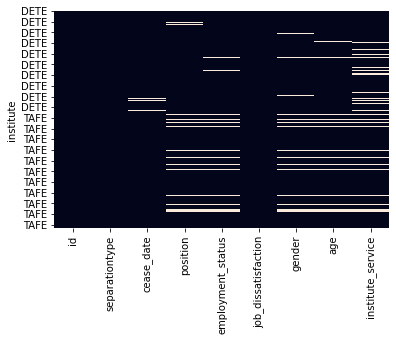

In [26]:
# Lets visualize our missing values
combined_updated = combined.set_index('institute')
sns.heatmap(combined_updated.isnull(), cbar=False)

print('We see that there is an acceptable amount of values missing. \nAs we also see that most values missing are in the same row (same entry), we will not lose much information by dropping these rows!')

In [27]:
combined_updated = combined.dropna()

In [28]:
# We will see no missing values anymore ;-)
# combined_updated = combined_updated.set_index('institute')
# sns.heatmap(combined_updated.isnull(), cbar=False)

#### Clean the "institute_service"-column
In order to perform our analysis we need to unify the length of employment

In [48]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
#combined_updated['institute_service'].value_counts() 

combined_updated['institute_service'] = combined_updated['institute_service'].str.replace("1-2","1.5").str.replace("3-4","3.5").str.replace("5-6","5.5").str.replace("7-10","8.5").str.replace("-1","0").str.replace("1813","18").str.replace("Less than 1 year","0").str.replace("More than 20 years","21").astype("float")
#combined_updated['institute_service'].value_counts()

#Categorize the employment experience in four categories
categories = []
for year in combined_updated['institute_service']:
    if year < 3:
        categories.append("New")
    elif year >= 3 and year < 6:
        categories.append("Experienced")
    elif year >= 6 and year < 10:
        categories.append("Established")
    elif year >= 10:
        categories.append("Veteran")
    

#let's add this information as another new column
combined_updated['institute_service_cat'] = categories    

<ipython-input-48-1de102d004e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
<ipython-input-48-1de102d004e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].str.replace("1-2","1.5").str.replace("3-4","3.5").str.replace("5-6","5.5").str.replace("7-10","8.5").str.replace("-1","0").str.replace("1813","18").str.replace("Less than 1 year","

In [49]:
combined_updated['institute_service_cat'].value_counts()

New            235
Experienced    159
Veteran         88
Established     60
Name: institute_service_cat, dtype: int64

In [115]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 3 to 701
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     542 non-null    int64  
 1   separationtype         542 non-null    object 
 2   cease_date             542 non-null    float64
 3   position               542 non-null    object 
 4   employment_status      542 non-null    object 
 5   job_dissatisfaction    542 non-null    object 
 6   gender                 542 non-null    object 
 7   age                    542 non-null    object 
 8   institute_service      542 non-null    float64
 9   institute              542 non-null    object 
 10  institute_service_cat  542 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 70.8+ KB


In [118]:
plt_df = combined_updated.iloc[:,[5,10]].groupby('institute_service_cat').count()
plt_df

,job_dissatisfaction
institute_service_cat,
Established,60
Experienced,159
New,235
Veteran,88


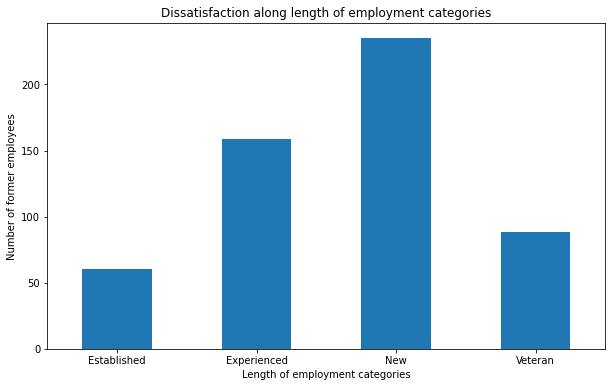

In [133]:
plt_df.groupby(["institute_service_cat"])[["job_dissatisfaction"]].sum().plot(kind='bar', legend = 0, rot = 0, title = "Dissatisfaction along length of employment categories", ylabel = "Number of former employees", xlabel = "Length of employment categories")
plt.gcf().set_size_inches(10,6)
plt.show()

(array([ 60.,   0.,  88.,   0., 159.,   0., 235.]),
 array([0.        , 0.42857143, 0.85714286, 1.28571429, 1.71428571,
        2.14285714, 2.57142857, 3.        ]),
 <BarContainer object of 7 artists>)

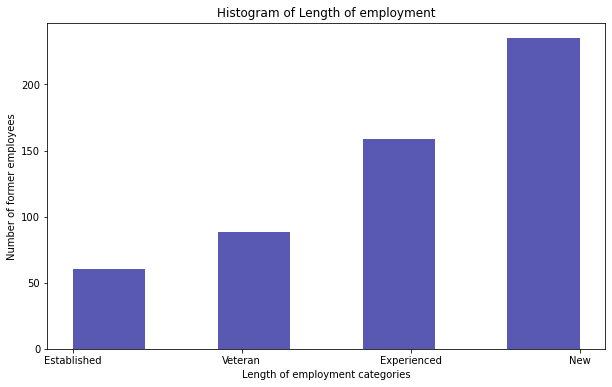

In [144]:
plt.xlabel('Length of employment categories')
plt.ylabel('Number of former employees')
plt.title('Histogram of Length of employment')
plt.gcf().set_size_inches(10,6)
plt.hist(combined_updated['institute_service_cat'], bins = 7, color='darkblue', alpha=0.65)